In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

#전처리

Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-0.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-1.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-10.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-11.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-12.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-13.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-14.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-15.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-16.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-17.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-18.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-19.png
Saved: /mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-2.png
Saved: /mnt/d/E

KeyboardInterrupt: 

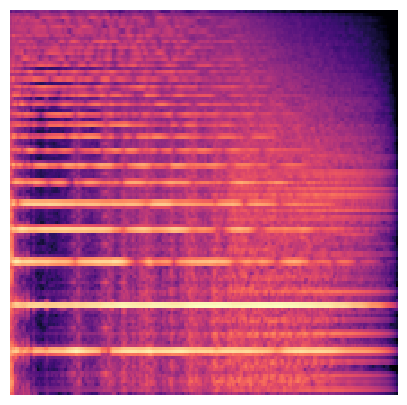

In [3]:
# 입력 및 출력 폴더 경로 설정
input_folder = "/mnt/d/EGFxSet/datasets"  # .wav 파일들이 있는 최상위 폴더
output_folder = "/mnt/d/EGFxSet/datasets/mel_spectrograms"  # 변환된 이미지가 저장될 폴더

# 저장 폴더가 없으면 생성
os.makedirs(output_folder, exist_ok=True)

def save_mel_spectrogram(wav_path, save_path, sr=22050, n_mels=128):
    """ .wav 파일을 멜 스펙트로그램 이미지로 변환 후 저장 """
    try:
        # 오디오 파일 로드
        y, sr = librosa.load(wav_path, sr=sr)
        
        # 멜 스펙트로그램 변환
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # dB 스케일 변환
        
        # 이미지로 저장
        plt.figure(figsize=(5, 5))
        librosa.display.specshow(mel_spec_db, sr=sr, cmap='magma')
        plt.axis('off')  # 축 숨김
        
        # 저장 (transparent=True로 배경 제거)
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()
    except Exception as e:
        print(f"Error processing {wav_path}: {e}")

# 폴더를 순회하며 변환 수행
for effect in os.listdir(input_folder):
    effect_path = os.path.join(input_folder, effect)
    if os.path.isdir(effect_path):  # 첫 번째 폴더 (이펙트)
        
        for pickup in os.listdir(effect_path):
            pickup_path = os.path.join(effect_path, pickup)
            if os.path.isdir(pickup_path):  # 두 번째 폴더 (픽업 포지션)
                
                for wav_file in os.listdir(pickup_path):
                    if wav_file.endswith(".wav"):  # .wav 파일만 처리
                        wav_path = os.path.join(pickup_path, wav_file)
                        
                        # 저장할 폴더 경로 유지
                        save_dir = os.path.join(output_folder, effect, pickup)
                        os.makedirs(save_dir, exist_ok=True)
                        
                        # 저장할 파일 경로 설정
                        save_path = os.path.join(save_dir, wav_file.replace(".wav", ".png"))
                        
                        # 멜 스펙트로그램 저장 실행
                        save_mel_spectrogram(wav_path, save_path)
                        print(f"Saved: {save_path}")


In [4]:
import os
import pandas as pd

# 입력 폴더 및 출력 CSV 파일 설정
input_folder = "/mnt/d/EGFxSet/datasets/mel_spectrograms"  # 이미지 파일들이 저장된 최상위 폴더
output_csv = "/mnt/d/EGFxSet/datasets/mel_spectrograms/image.csv"  # 저장할 CSV 파일 경로

# 데이터를 저장할 딕셔너리
csv_data = {"fingerboard": []}  # 첫 번째 열 (기타 지판 포지션)

# 폴더를 순회하며 데이터 수집
for effect in os.listdir(input_folder):
    effect_path = os.path.join(input_folder, effect)
    if os.path.isdir(effect_path):  # 첫 번째 하위 폴더 (이펙터)

        for pickup in os.listdir(effect_path):
            pickup_path = os.path.join(effect_path, pickup)
            if os.path.isdir(pickup_path):  # 두 번째 하위 폴더 (픽업 포지션)

                # 컬럼 이름 설정 (이펙터_픽업 형태)
                column_name = f"{effect}_{pickup}"
                if column_name not in csv_data:
                    csv_data[column_name] = []

                # 파일 순회
                filepaths = []
                for img_file in os.listdir(pickup_path):
                    if img_file.endswith(".png"):  # 이미지 파일만 처리
                        file_path = os.path.join(pickup_path, img_file)
                        filepaths.append(file_path)

                # 정렬하여 데이터 추가
                filepaths.sort()  # 정렬 (필요 시)
                csv_data[column_name].extend(filepaths)

# 최대 파일 개수에 맞춰 빈 값 채우기
max_len = max(len(paths) for paths in csv_data.values())
for key in csv_data:
    while len(csv_data[key]) < max_len:
        csv_data[key].append("")

# 데이터프레임 생성 및 저장
df = pd.DataFrame(csv_data)
df.to_csv(output_csv, index=False)
print(f"CSV 파일이 생성되었습니다: {output_csv}")

CSV 파일이 생성되었습니다: /mnt/d/EGFxSet/datasets/mel_spectrograms/image.csv


#Model

In [5]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2025-02-05 11:21:50.867724: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-05 11:21:54.239381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# CSV 파일 경로 설정
csv_file = "/mnt/d/EGFxSet/datasets/mel_spectrograms/image.csv"
data = pd.read_csv(csv_file)

# 데이터 준비
image_paths = []
labels = []

# CSV 데이터를 기반으로 이미지 경로와 레이블 추출
for column in data.columns[1:]:  # 첫 번째 열(fingerboard)을 제외
    paths = data[column].dropna().tolist()  # NaN 값 제외
    image_paths.extend(paths)
    labels.extend([column] * len(paths))

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 데이터셋 분할 (80% 학습, 20% 검증)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, encoded_labels, test_size=0.2, random_state=42
)


In [13]:
# 이미지 크기와 배치 크기 설정
IMG_SIZE = (128, 128)  # 이미지 크기
BATCH_SIZE = 32  # 배치 크기

# 수정된 preprocess_image 함수 (전역 IMG_SIZE 사용)
def preprocess_image(image_path, label, img_size=IMG_SIZE):  # 기본값 설정
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, img_size)  # 전역 IMG_SIZE를 기본값으로 사용
    image = image / 255.0  # 정규화
    return image, label

# TensorFlow 데이터셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_dataset = train_dataset.map(lambda x, y: preprocess_image(x, y)).batch(BATCH_SIZE).shuffle(1000).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_dataset = val_dataset.map(lambda x, y: preprocess_image(x, y)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [14]:
# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
# 모델 학습
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30
)

Epoch 1/30


2025-02-05 11:25:04.332482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [7176]
	 [[{{node Placeholder/_1}}]]
2025-02-05 11:25:04.332774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [7176]
	 [[{{node Placeholder/_1}}]]
2025-02-05 11:25:04.902728: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-02-05 11:25:08.331583: I tensorflow/compile

222/225 [============================>.] - ETA: 0s - loss: 3.5067 - accuracy: 0.0799

2025-02-05 11:25:18.411252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1794]
	 [[{{node Placeholder/_1}}]]


225/225 [==============================] - 15s 9ms/step - loss: 3.4982 - accuracy: 0.0810 - val_loss: 2.4090 - val_accuracy: 0.2781
Epoch 2/30
225/225 [==============================] - 4s 8ms/step - loss: 2.1596 - accuracy: 0.3127 - val_loss: 1.2772 - val_accuracy: 0.6087
Epoch 3/30
225/225 [==============================] - 4s 8ms/step - loss: 1.4513 - accuracy: 0.4847 - val_loss: 0.8801 - val_accuracy: 0.6934
Epoch 4/30
225/225 [==============================] - 4s 8ms/step - loss: 1.1070 - accuracy: 0.5924 - val_loss: 0.6132 - val_accuracy: 0.7960
Epoch 5/30
225/225 [==============================] - 4s 8ms/step - loss: 0.9044 - accuracy: 0.6671 - val_loss: 0.5083 - val_accuracy: 0.8127
Epoch 6/30
225/225 [==============================] - 4s 8ms/step - loss: 0.7860 - accuracy: 0.7055 - val_loss: 0.3949 - val_accuracy: 0.8612
Epoch 7/30
225/225 [==============================] - 4s 8ms/step - loss: 0.7111 - accuracy: 0.7304 - val_loss: 0.3950 - val_accuracy: 0.8517
Epoch 8/30
225/2

In [16]:
# 모델 저장
model.save("/mnt/d/EGFxSet/datasets/guitar_tone_classifier.h5")

# 레이블 매핑 저장
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
with open("label_mapping.json", "w") as f:
    import json
    json.dump(label_mapping, f)

print("모델과 레이블 매핑이 저장되었습니다.")

모델과 레이블 매핑이 저장되었습니다.


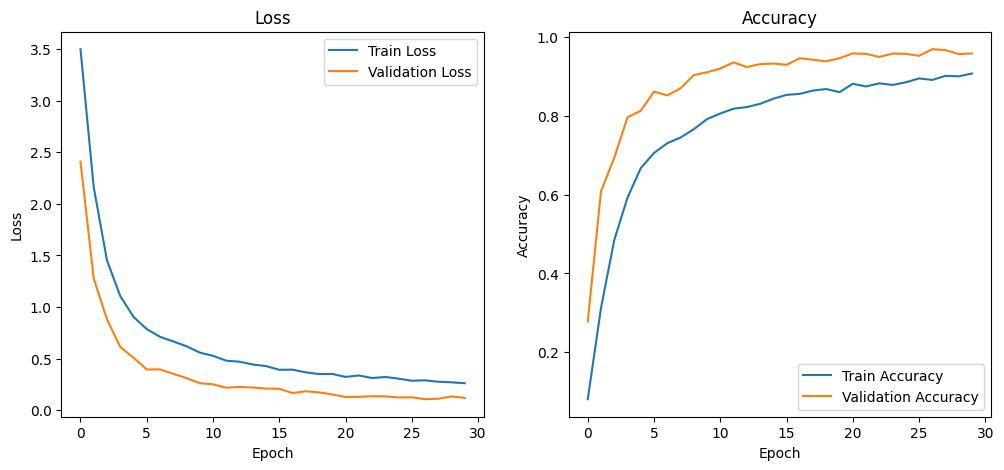

In [17]:
# 학습 결과 시각화
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Loss 시각화
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy 시각화
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 결과 시각화 호출
plot_history(history)

In [18]:
def predict_image(image_path, model, label_mapping):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0  # 정규화
    image = tf.expand_dims(image, axis=0)  # 배치 차원 추가

    predictions = model.predict(image)
    predicted_label = label_mapping[int(tf.argmax(predictions[0]))]

    plt.imshow(tf.squeeze(image))  # 이미지를 시각화
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 12ms/step


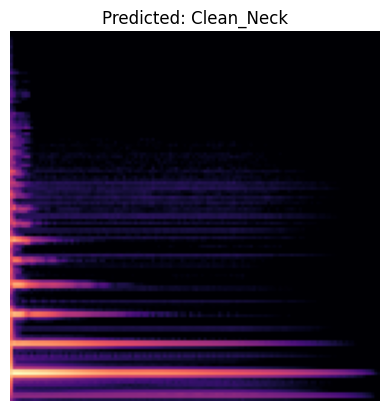

In [24]:
predict_image('/mnt/d/EGFxSet/datasets/mel_spectrograms/Clean/Neck/5-15.png', model, label_mapping)

1/1 [==============================] - 0s 13ms/step


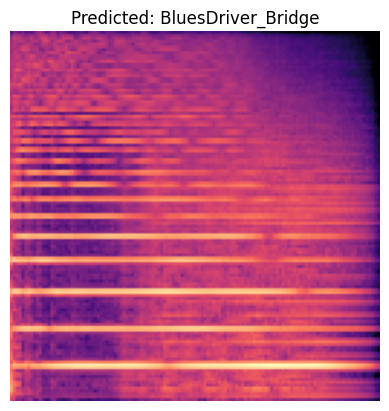

In [20]:
predict_image('/mnt/d/EGFxSet/datasets/mel_spectrograms/BluesDriver/Bridge/1-0.png', model, label_mapping)

1/1 [==============================] - 0s 15ms/step


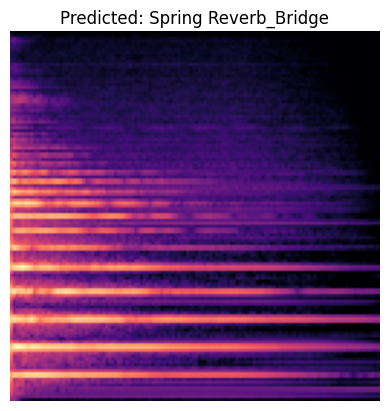

In [23]:
predict_image('/mnt/d/EGFxSet/datasets/mel_spectrograms/Spring Reverb/Bridge/2-0.png', model, label_mapping)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0